In [17]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Harcoded way for the fist n entries

In [18]:
#arxiv_data = []
#line_count = 0

#file_path = r'C:\Users\danie\Documents\Uni\Semester 13\Datascience 2\Projekte\Projekt1\arxiv-metadata-oai-snapshot.json'

#for line in open(file_path, 'r'):
#    arxiv_data.append(json.loads(line))
#    line_count += 1

#    if line_count == 100:
#        break
#df = pd.DataFrame(arxiv_data)

# Create random sample of n-percent of the data

In [19]:
arxiv_data = []
file_path = r'C:\Users\danie\Documents\Uni\Semester 13\Datascience 2\Projekte\Projekt1\arxiv-metadata-oai-snapshot.json'

sample_percentage = 0.001

with open(file_path, 'r') as file:
    for line in file:
        if random.uniform(0, 1) < sample_percentage:
            arxiv_data.append(json.loads(line))

df = pd.DataFrame(arxiv_data)

In [20]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0102,Steven Dale Cutkosky,"Marc Chardin, Steven Dale Cutkosky, Juergen He...",Duality and Tameness,18 pages,None,None,None,math.AC math.AG,None,We prove a duality theorem for certain grade...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[[Chardin, Marc, ], [Cutkosky, Steven Dale, ],..."
1,0704.1720,Mikko Laine,M. Laine,A resummed perturbative estimate for the quark...,"16 pages. v2: misprint fixed, minor additions","JHEP 0705:028,2007",10.1088/1126-6708/2007/05/028,None,hep-ph hep-lat,None,By making use of the finite-temperature real...,"[{'version': 'v1', 'created': 'Fri, 13 Apr 200...",2009-11-13,"[[Laine, M., ]]"
2,0704.2269,Zbigniew Ficek,S. Natali and Z. Ficek,Temporal and diffraction effects in entangleme...,"Phys. Rev. A75, 042307 (2007)",None,10.1103/PhysRevA.75.042307,None,quant-ph,None,A practical scheme for entanglement creation...,"[{'version': 'v1', 'created': 'Wed, 18 Apr 200...",2015-05-13,"[[Natali, S., ], [Ficek, Z., ]]"
3,0704.2762,Robert Stencel,"D. E. Mais (1), D. Richards (2) and R. E. Sten...",Three Years of Mira Variable CCD Photometry: W...,8 pages. Appeared in the Proceedings of the Ma...,None,None,None,astro-ph,None,The subject of micro-variability among Mira ...,"[{'version': 'v1', 'created': 'Fri, 20 Apr 200...",2007-05-23,"[[Mais, D. E., ], [Richards, D., ], [Stencel, ..."
4,0704.3067,Brant Jones,Brant C. Jones,Kazhdan--Lusztig polynomials for maximally-clu...,18 pages,None,None,None,math.CO math.RT,None,We provide a non-recursive description for t...,"[{'version': 'v1', 'created': 'Mon, 23 Apr 200...",2007-05-23,"[[Jones, Brant C., ]]"


Explaining the columns:
id: ArXiv ID (can be used to access the paper, see below) (dropped, not needed)
submitter: Who submitted the paper
authors: Authors of the paper
title: Title of the paper
comments: Additional info, such as number of pages and figures
journal-ref: Information about the journal the paper was published in
doi: [https://www.doi.org](Digital Object Identifier)    (dropped, not needed)
abstract: The abstract of the paper
categories: Categories / tags in the ArXiv system
versions: A version history

Source: Kaggle

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2315 non-null   object
 1   submitter       2304 non-null   object
 2   authors         2315 non-null   object
 3   title           2315 non-null   object
 4   comments        1754 non-null   object
 5   journal-ref     816 non-null    object
 6   doi             1139 non-null   object
 7   report-no       165 non-null    object
 8   categories      2315 non-null   object
 9   license         1850 non-null   object
 10  abstract        2315 non-null   object
 11  versions        2315 non-null   object
 12  update_date     2315 non-null   object
 13  authors_parsed  2315 non-null   object
dtypes: object(14)
memory usage: 253.3+ KB


In [22]:
df.describe()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
count,2315,2304,2315,2315,1754,816,1139,165,2315,1850,2315,2315,2315,2315
unique,2315,2281,2314,2315,1518,816,1139,165,815,9,2315,2315,1344,2313
top,0704.0102,EPTCS,Benjamin McKay (University College Cork),Duality and Tameness,12 pages,"JHEP 0705:028,2007",10.1088/1126-6708/2007/05/028,"IMAFF-FM-07-01, NIKHEF/2007-13",astro-ph,http://arxiv.org/licenses/nonexclusive-distrib...,We prove a duality theorem for certain grade...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[[McKay, Benjamin, , University College Cork]]"
freq,1,3,2,1,11,1,1,1,95,1521,1,1,153,2


In [23]:
df.isnull().sum()

id                   0
submitter           11
authors              0
title                0
comments           561
journal-ref       1499
doi               1176
report-no         2150
categories           0
license            465
abstract             0
versions             0
update_date          0
authors_parsed       0
dtype: int64

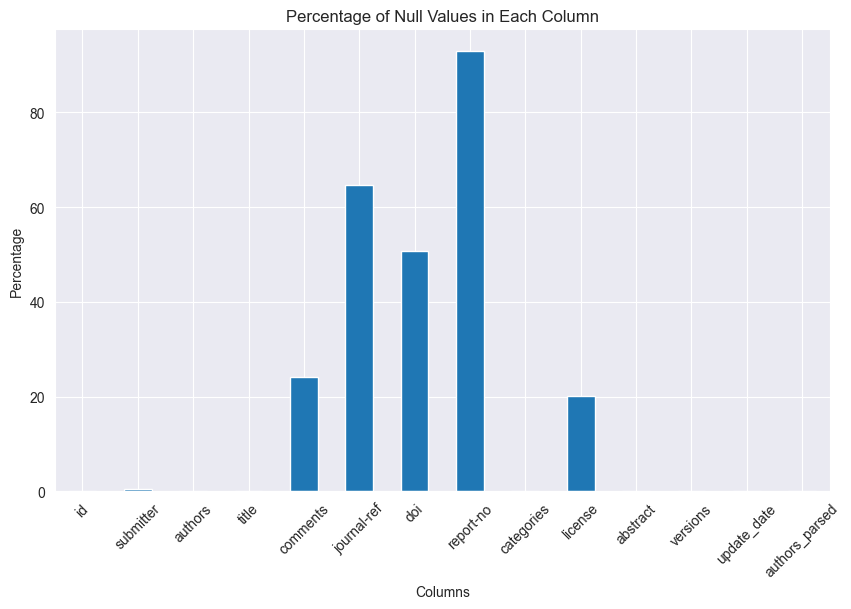

In [24]:
null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar')
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

ID column has no missing values, but we will drop it anyway.
Because the column `journal-ref` has 50% missing values, we will drop it.
Because the column `doi` has 10% missing values, we will drop it.
Because the column `report-no` has 90% missing values, we will drop it.
Because the column `license` has 90% missing values, we will drop it.

In [25]:
df.drop(['id', 'journal-ref', 'doi', 'report-no', 'license'], axis=1, inplace=True)

In [26]:
# Distribution of Categories
#plt.figure(figsize=(10, 11))
#sns.countplot(y='categories', data=df, order=df['categories'].value_counts().index)
#plt.title('Distribution of Categories')
#plt.xlabel('Number of Papers')
#plt.ylabel('Categories')
#plt.show()

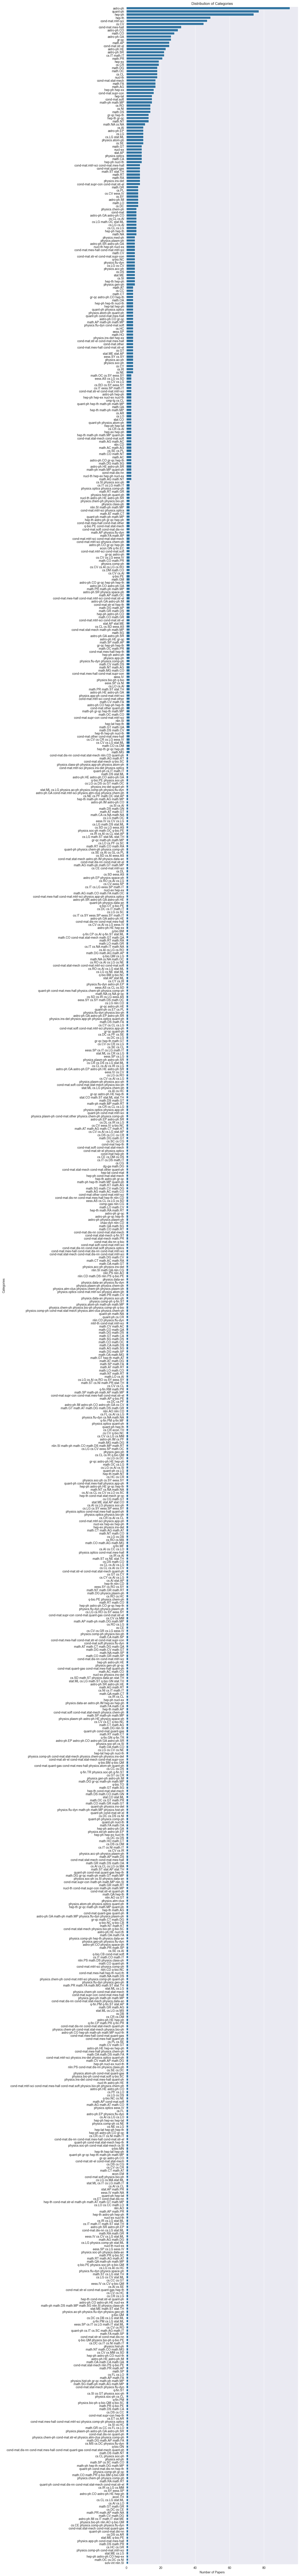

In [27]:
# Split multiple categories into separate rows
df_categories_split = df.assign(categories=df['categories'].str.split(',')).explode('categories')
df_only_categories = pd.DataFrame({'categories': df_categories_split['categories']})

# Count occurrences of each category
category_counts = df_only_categories['categories'].value_counts()

# Create a new DataFrame with counts and reset the index
df_category_counts = pd.DataFrame({'categories': category_counts.index, 'paper_count': category_counts.values})

# Plot the top 3 categories
plt.figure(figsize=(10, 150))
sns.barplot(x='paper_count', y='categories', data=df_category_counts)
plt.title('Distribution of Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Categories')
plt.show()

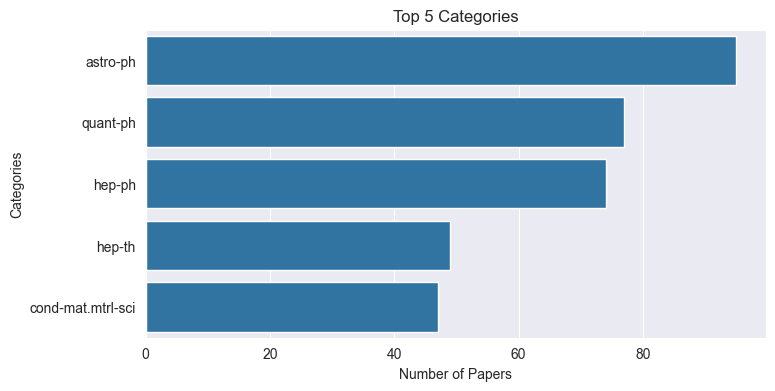

In [28]:
# plotting top 3 categories
plt.figure(figsize=(8, 4))
sns.countplot(y='categories', data=df, order=df['categories'].value_counts().iloc[:5].index)
plt.title('Top 5 Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Categories')
plt.show()


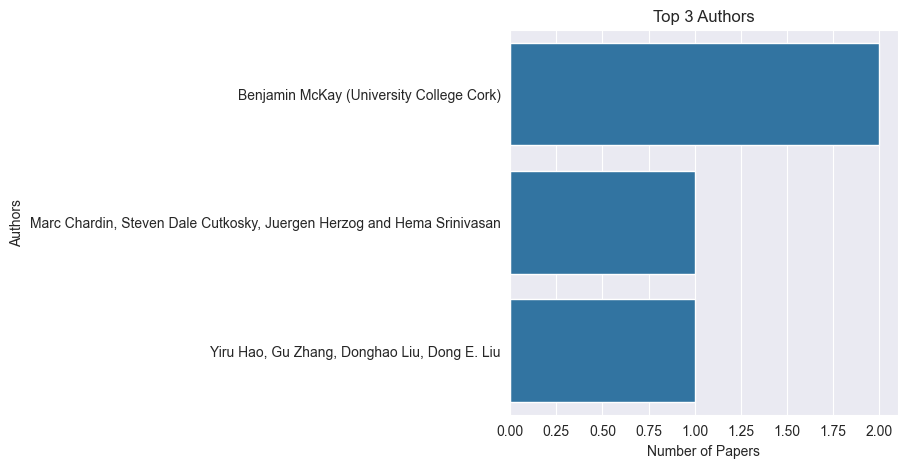

In [34]:
# plotting top 3 authors
plt.figure(figsize=(5, 5))
sns.countplot(y='authors', data=df, order=df['authors'].value_counts().iloc[:3].index)
plt.title('Top 3 Authors')
plt.xlabel('Number of Papers')
plt.ylabel('Authors')
plt.show()


# splitting authors

In [35]:
# Split multiple authors into separate rows
#df_authors_split = df.assign(authors=df['authors'].str.split(',')).explode('authors')
#df_only_authors = pd.DataFrame({'authors': df_authors_split['authors']})

# Count occurrences of each author
#author_counts = df_only_authors['authors'].value_counts()

# Create a new DataFrame with counts and reset the index
#df_counts = pd.DataFrame({'authors': author_counts.index, 'paper_count': author_counts.values})
#print(df_counts)

# Plot the top 3 authors
#plt.figure(figsize=(8, 4))
#sns.barplot(x='paper_count', y='authors', data=df_counts.head(3))
#plt.title('Top 3 Authors')
#plt.xlabel('Number of Papers')
#plt.ylabel('Authors')
#plt.show()

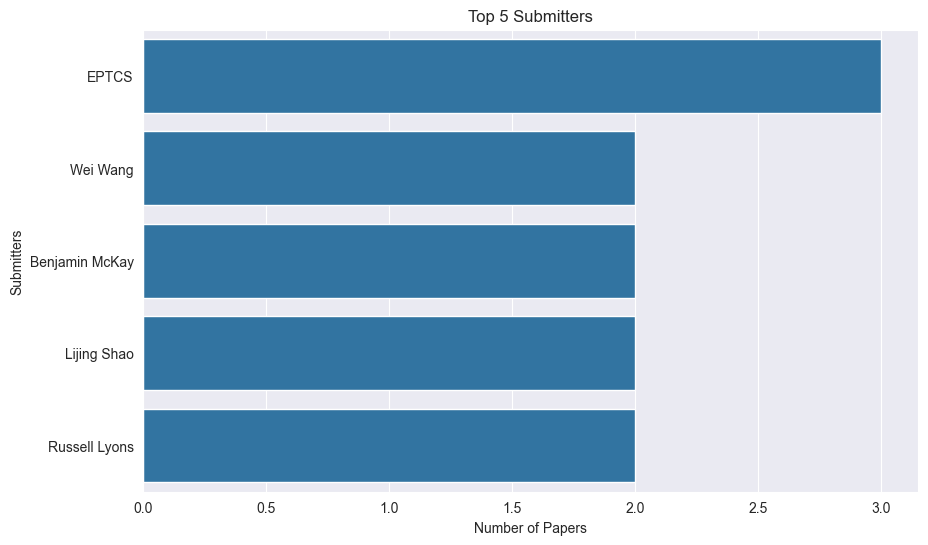

In [32]:
#plotting top 3 submitters
plt.figure(figsize=(10, 6))
sns.countplot(y='submitter', data=df, order=df['submitter'].value_counts().iloc[:5].index)
plt.title('Top 5 Submitters')
plt.xlabel('Number of Papers')
plt.ylabel('Submitters')
plt.show()
